<h2> II. Programming [9v] 
                           
<h4> Consider the diabetes.arff data available at the homework tab, comprising 8 biological features to 
classify 768 patients into 2 classes (normal, diabetes).

In [5]:
import seaborn as sns
import pandas as pd
from scipy.io import arff
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import numpy as np

data = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data[0])

<h4>  1)  [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a 
single input variable. Using f_classif from sklearn, identify the input variables with the 
worst and best discriminative power. Plot their class-conditional probability density 
functions.

Variable with the best discriminative power: Glucose:213.16175217803828
Variable with the worst discriminative power: BloodPressure:3.256950397889028


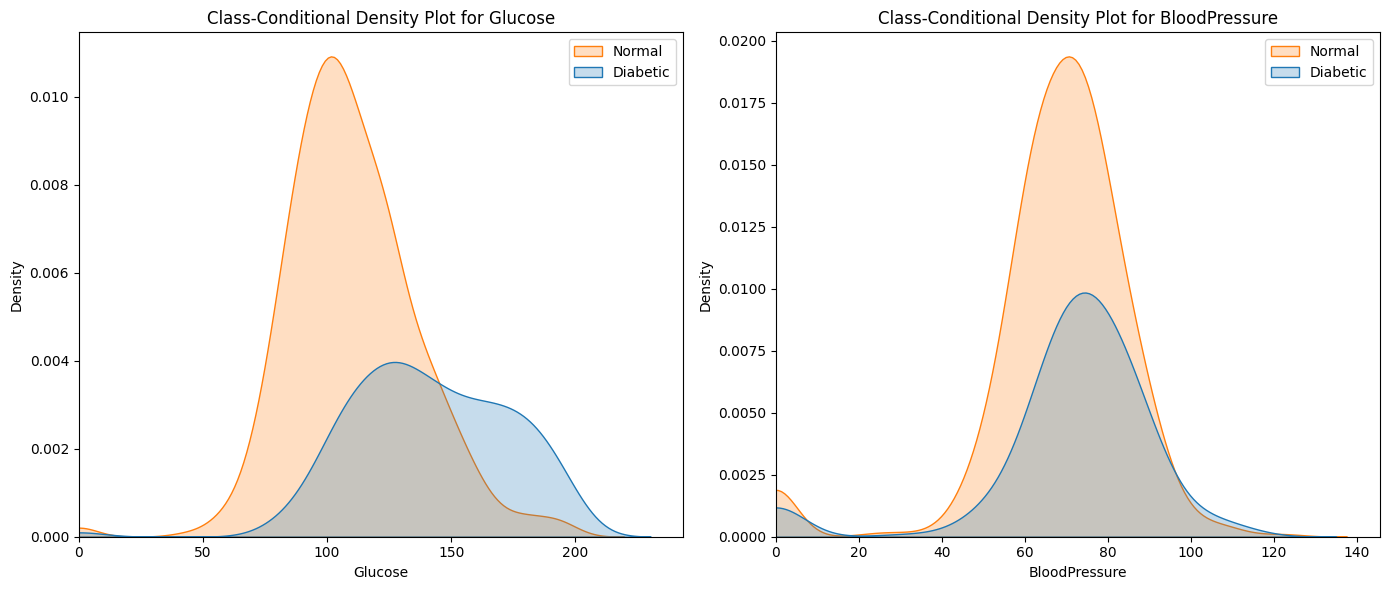

In [6]:
df['Outcome'] = df['Outcome'].str.decode('utf-8')
x = df.drop('Outcome', axis=1)
y = df['Outcome']

fimportance, p_value = f_classif(x, y)

feature_scores = sorted(zip(x.columns, fimportance), key=lambda x: x[1], reverse=True)
best_feature = feature_scores[0][0]
worst_feature = feature_scores[-1][0]
print(f"Variable with the best discriminative power: {best_feature}:{feature_scores[0][1]}")
print(f"Variable with the worst discriminative power: {worst_feature}:{feature_scores[-1][1]}")

plt.figure(figsize=(14, 6))

# Plot for the best feature
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Density Plot for {best_feature}')
plt.xlim(left=0)
plt.legend(title='', labels=["Normal", "Diabetic"])
# Plot for the worst feature
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Density Plot for {worst_feature}')
plt.xlim(left=0)
plt.legend(title='', labels=["Normal", "Diabetic"])

plt.tight_layout()

<h4>  2)  [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), 
assess in a single plot both the training and testing accuracies of a decision tree with minimum 
sample split in {2,5,10,20,30,50,100} and the remaining parameters as default.  
[optional] Note that split thresholding of numeric variables in decision trees is non-
deterministic in sklearn, hence you may opt to average the results using 10 runs per 
parameterization.

Train accuracies:  [1.0, 0.97, 0.94, 0.88, 0.85, 0.84, 0.79] 
Test accuracies:  [0.69, 0.69, 0.69, 0.73, 0.77, 0.76, 0.75]


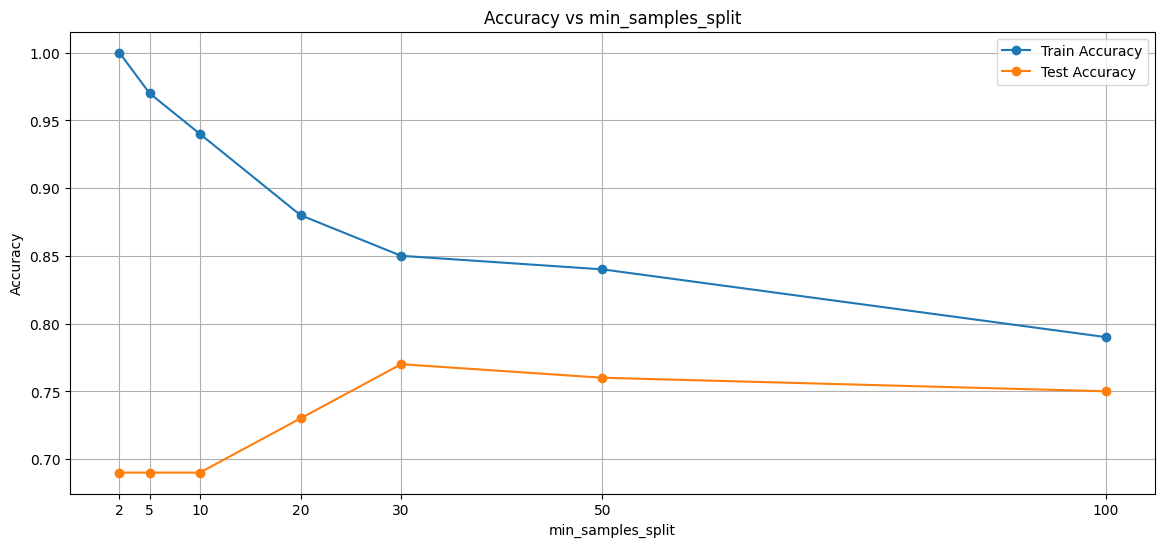

In [7]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

sample_split = [2, 5, 10, 20, 30, 50, 100]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=1)

accuracies_train = []
accuracies_test = []

for split in sample_split:
    split_accuracies_train = []
    split_accuracies_test = []
    for i in range(10):
        predictor = DecisionTreeClassifier(min_samples_split=split, random_state=1)
        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_train)
        y_pred1 = predictor.predict(X_test)
        split_accuracies_train.append(metrics.accuracy_score(y_train, y_pred))
        split_accuracies_test.append(metrics.accuracy_score(y_test, y_pred1))
    avg_accuracy_train = np.mean(split_accuracies_train)
    accuracies_train.append(avg_accuracy_train)
    avg_accuracy_test = np.mean(split_accuracies_test)
    accuracies_test.append(avg_accuracy_test)

accuracies_train = [round(acc, 2) for acc in accuracies_train]
accuracies_test = [round(acc, 2) for acc in accuracies_test]

print("Train accuracies: ", accuracies_train, "\nTest accuracies: ", accuracies_test)
plt.figure(figsize=(14, 6))
plt.plot(sample_split, accuracies_train, marker='o', label='Train Accuracy')
plt.plot(sample_split, accuracies_test, marker='o', label='Test Accuracy')
plt.grid()
plt.xticks(sample_split)
plt.title('Accuracy vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


<h4>  3) [2v]  Critically analyze these results, including the generalization capacity across settings.

&nbsp;&nbsp;&nbsp;Para valores baixos do minimum sample split ({2, 5, 10}), os resultados mostram sintomas de “overfitting”, uma vez que o modelo tem um bom desempenho nos dados de treino ({1,0, 0,97, 0,94}), mas um desempenho fraco no conjunto de teste ({0,69, 0,69, 0,69}). Isso acontece porque o modelo se ajusta demais ao conjunto de treino e não se generaliza bem para novos dados.

&nbsp;&nbsp;&nbsp;À medida que a minimum sample split aumenta para valores intermédios ({20, 30}), a precisão do treino diminui ({0,88, 0,85}), mas a precisão do teste melhora ({0,73, 0,77}), atingindo o pico com uma minimum sample split de 30. Isto acontece porque, embora a precisão do treino diminua, a capacidade do modelo para generalizar para novos dados, possivelmente não abrangidos pelos dados de treino, aumenta, levando a uma melhor precisão do teste.

&nbsp;&nbsp;&nbsp;Para valores mais elevados do minimum sample split ({50, 100}), as accuracies de treino e de teste diminuem ({0,84, 0,79} para o treino e {0,76, 0,75} para o teste). Isto acontece porque o modelo se torna demasiado geral e pouco preciso, o que significa que a sua capacidade de previsão diminui ligeiramente tanto para os dados de treino como para os de teste.

&nbsp;&nbsp;&nbsp;Em conclusão, devem ser evitados valores baixos de minimum sample split para evitar “overfitting”, mas também devem ser evitados valores excessivamente altos para evitar que o modelo se torne demasiado generalizado. O equilíbrio entre as precisões de treino e de teste é fundamental para escolher a divisão mínima de amostras ideal.


<h4>  4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree 
(random_state=1) using all available data and ensuring that the maximum depth would be 3 
in order to avoid overfitting risks.</font>

<h5>&nbsp;i. Plot the decision tree. </font>

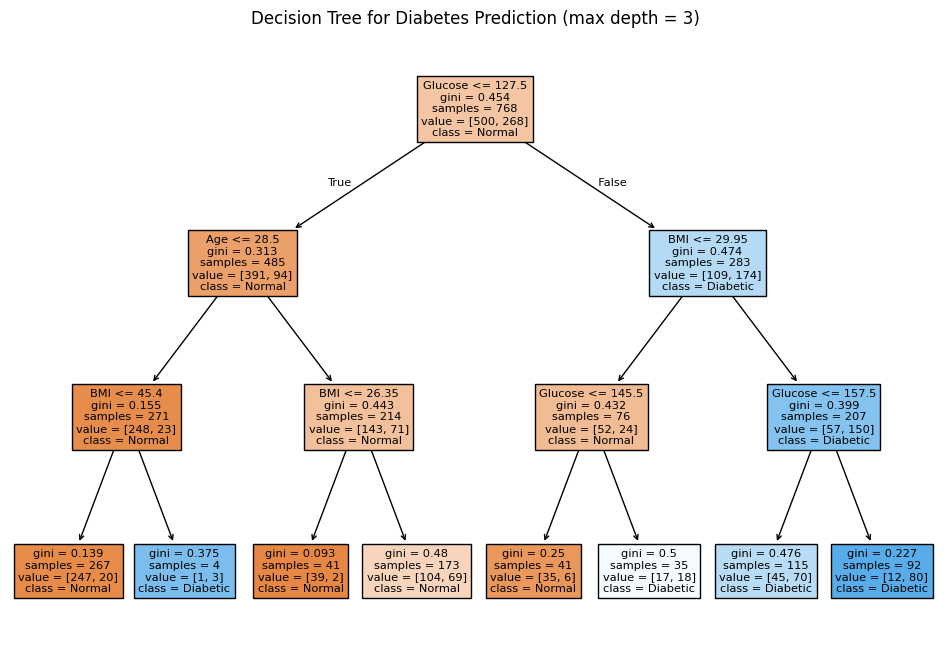

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(x, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=x.columns, class_names=['Normal', 'Diabetic'], filled=True)
plt.title('Decision Tree for Diabetes Prediction (max depth = 3)')
plt.show()

<h5>&nbsp;ii. Explain what characterizes diabetes by identifying the conditional associations together with their posterior probabilities.</font>

&nbsp;&nbsp;&nbsp;Através da árvore, podemos observar que existem três grupos de pacientes diagnosticados com Diabetes, cada um com condições específicas e probabilidades posteriores associadas.

&nbsp;&nbsp;&nbsp;Para o primeiro grupo, os doentes têm de ter um nível de Glucose inferior ou igual a 127,5, ter idade igual ou inferior a 28,5 anos e ter um IMC superior a 45,4. Este grupo tem uma probabilidade posterior de 75% (3 em cada 4 doentes que correspondem a estas condições são diabéticos).

&nbsp;&nbsp;&nbsp;No segundo grupo, as condições incluem ter um nível de Glucose superior a 127,5 e um IMC superior a 29,95, com uma probabilidade posterior de 72,5% (150 de 207 doentes que correspondem a estas condições são diabéticos).

&nbsp;&nbsp;&nbsp;Finalmente, para o terceiro grupo, os doentes devem ter um nível de Glucose superior a 145,5 e um IMC inferior ou igual a 29,95, o que resulta numa probabilidade posterior de 51,4% (18 dos 35 doentes que correspondem a estas condições são diabéticos).